Python Odyssey Logisti regression playlist : https://www.youtube.com/watch?v=K1lGWWkuvxc&list=PLUgYBRHnEddPVGoFJT7EcIYjmtWEIgN-A

Python Odyssey repo: https://github.com/AjitAntony
        
        

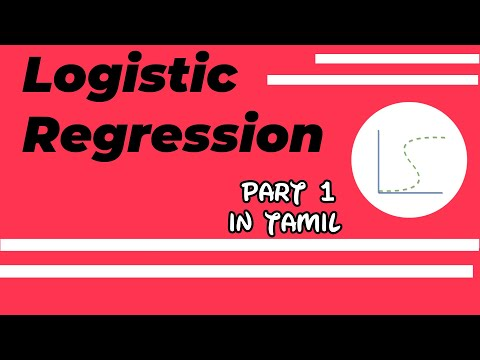

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('K1lGWWkuvxc')

# Logistic Regression
This is a typical dataset used to teach how to perform logistic regression to predict whether a passenger survived or not during the ill-fated voyage of the Titanic

Feature

    -Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    -name Name
    -sex Sex
    -age Age
    -sibsp Number of Siblings/Spouses Aboard
    -parch Number of Parents/Children Aboard
    -ticket Ticket Number
    -fare Passenger Fare (British pound)
    -cabin Cabin
    -embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


Target

    -survival Survival (0 = No; 1 = Yes)
    
    
## Not Going to solve Any real word problem
## Apply the concepts learned here to built a classification model (EDA->Feature Engineering->Feature Selection->Model->Evaluate->Predict)for a similar usecase 

    - In Titanic Dataset based on passengers features we are predict if passender will survive/notsurvive 
    - Uses built to solve RealWorld problems 
         - Based on person features(Age,Smoke,Family History) we can predict if person  has cancer/not cancer
         - Based on person features (Age,Smoke,Family History) we can  predict if preson  has obestiy/ Not Obesity 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Capture interesting facts present in  Survived column 

In [8]:
df["Survived"]

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

# Survived vs Not Survived count 

In [9]:
df["Survived"].value_counts()

0    815
1    494
Name: Survived, dtype: int64

# Survived vs Not Survived count at gender level 

In [10]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,81,385
male,734,109


# Survived vs Not Survived count at gender level and Age level

In [11]:
woman=df[df["Sex"]=="female"]

In [12]:
woman

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [13]:
woman_survived=woman[woman["Survived"]==1]
woman_not_survived=woman[woman["Survived"]==0]

In [14]:
man=df[df["Sex"]=="male"]
man_survived=man[man["Survived"]==1]
man_not_survived=man[man["Survived"]==0]

In [15]:
man_not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


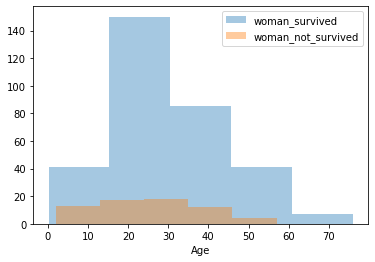

In [16]:
# Age- 1-100 --> 1,20 - bin1 ,20-40bin2 ,40-60-bin3,60-80 bin4,80-100bin5
#Histogram
sns.distplot(woman_survived.Age,bins=5,label="woman_survived",kde=False)
sns.distplot(woman_not_survived.Age,bins=5,label="woman_not_survived",kde=False)
plt.legend()

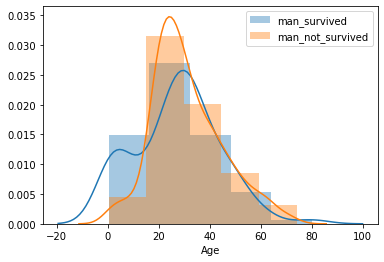

In [17]:
sns.distplot(man_survived.Age,bins=5,label="man_survived",kde=True)
sns.distplot(man_not_survived.Age,bins=5,label="man_not_survived",kde=True)
plt.legend()

In [18]:
#Histogram -> affect by bin value   - Y count
#KDE -> dose not get affect by bin values -Y probability 

# Feature engineering 
    -filling missing values
    -variable transformation


In [23]:
len(list(df.columns.values))

12

In [24]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
df.isnull().sum()

# cabin -> 
#[1,2,NAN,NAN,5]
#[False,False,True,True,False]
#[0,0,1,1,0] -> 2

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

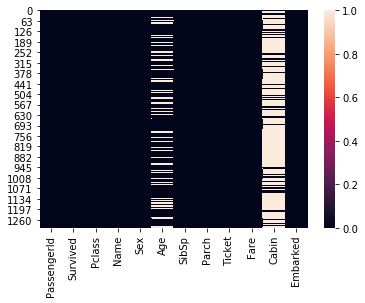

In [28]:
sns.heatmap(df.isnull())

# CABIN 

In [30]:
df.shape

(1309, 12)

In [33]:
#1  df=df.drop(["Cabin"],axis=1)
#2 inplace=True

df.drop(["Cabin"],axis=1,inplace=True)

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

# Embarked

In [37]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [40]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [41]:
df["Embarked"]=df["Embarked"].fillna("S")

In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

# Age 

In [49]:
#df["Age"].mean()
#df["Age"].median()
#df["Age"].mode()

0    24.0
dtype: float64

In [57]:
age_tmp=np.array([1,2,3,np.NAN,np.NAN,6,7,8,np.NAN,10])
age_tmp

array([ 1.,  2.,  3., nan, nan,  6.,  7.,  8., nan, 10.])

In [59]:
random_age_tmp=np.random.randint(1,100,3)
random_age_tmp

array([ 6,  3, 44])

In [60]:
np.isnan(age_tmp)

array([False, False, False,  True,  True, False, False, False,  True,
       False])

In [62]:
age_tmp[np.isnan(age_tmp)]=random_age_tmp

In [63]:
age_tmp

array([ 1.,  2.,  3.,  6.,  3.,  6.,  7.,  8., 44., 10.])

# Handling missing values on AGE column 

In [65]:
mean_age=df["Age"].mean()
mean_age

29.881137667304014

In [66]:
std_age=df["Age"].std()
std_age

14.413493211271321

In [67]:
low_age=mean_age-std_age
low_age

15.467644456032692

In [68]:
high_age=mean_age+std_age
high_age

44.29463087857533

In [70]:
random_ages=np.random.randint(15,44,263)
random_ages

array([15, 41, 30, 22, 37, 20, 36, 42, 34, 23, 43, 20, 28, 33, 39, 42, 42,
       23, 40, 27, 34, 27, 23, 33, 33, 25, 21, 17, 23, 32, 38, 28, 40, 21,
       29, 35, 33, 42, 35, 37, 20, 26, 41, 29, 32, 33, 17, 29, 31, 26, 21,
       39, 37, 43, 17, 24, 25, 27, 43, 24, 19, 17, 38, 23, 43, 22, 43, 37,
       42, 15, 17, 29, 28, 36, 33, 27, 19, 17, 34, 27, 39, 20, 26, 29, 34,
       25, 28, 18, 16, 36, 21, 39, 23, 16, 31, 30, 36, 25, 31, 34, 17, 24,
       38, 39, 23, 40, 15, 36, 37, 17, 30, 25, 33, 19, 35, 16, 21, 18, 41,
       34, 22, 16, 36, 22, 28, 41, 33, 19, 17, 34, 25, 31, 36, 29, 37, 43,
       41, 26, 27, 42, 25, 29, 31, 25, 42, 25, 22, 29, 18, 15, 31, 33, 43,
       32, 33, 32, 28, 30, 22, 17, 23, 22, 34, 29, 30, 26, 35, 42, 32, 39,
       17, 20, 18, 21, 25, 38, 30, 34, 37, 34, 29, 37, 42, 22, 33, 36, 26,
       34, 37, 21, 40, 42, 34, 37, 22, 37, 35, 33, 23, 28, 15, 30, 23, 25,
       28, 16, 33, 20, 24, 22, 30, 42, 17, 27, 38, 30, 20, 24, 42, 22, 16,
       39, 41, 39, 37, 15

In [72]:
age_copy=df["Age"].copy()
age_copy

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64

In [73]:
age_copy[np.isnan(age_copy)]=random_ages
age_copy

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    31.0
1305    39.0
1306    38.5
1307    40.0
1308    35.0
Name: Age, Length: 1309, dtype: float64

In [74]:
df["Age"]=age_copy

In [75]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

 # FARE

In [76]:
df.dropna(inplace=True)

In [77]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# variable transformation

In [78]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,31.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,40.0,0,0,359309,8.0500,S


In [79]:
df["Sex"].value_counts()

male      842
female    466
Name: Sex, dtype: int64

In [80]:
df["Sex"]=df["Sex"].map({"male":"0","female":"1"})

In [81]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,31.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",0,40.0,0,0,359309,8.0500,S


In [82]:
df["Embarked"].value_counts()

S    915
C    270
Q    123
Name: Embarked, dtype: int64

In [85]:
boarding_point=pd.get_dummies(df["Embarked"],drop_first=True)
boarding_point

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [88]:
df.drop(["Name","Ticket","PassengerId","Embarked"],axis=1,inplace=True)

In [90]:
df=pd.concat([df,boarding_point],axis=1)

In [91]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,0,31.0,0,0,8.0500,0,1
1305,1,1,1,39.0,0,0,108.9000,0,0
1306,0,3,0,38.5,0,0,7.2500,0,1
1307,0,3,0,40.0,0,0,8.0500,0,1


# Model Building

In [93]:
X=df.drop("Survived",axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
1304,3,0,31.0,0,0,8.0500,0,1
1305,1,1,39.0,0,0,108.9000,0,0
1306,3,0,38.5,0,0,7.2500,0,1
1307,3,0,40.0,0,0,8.0500,0,1


In [94]:
Y=df["Survived"]
Y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1308, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)


In [97]:
model=LogisticRegression(max_iter=500)

In [99]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [100]:
predicted_res=model.predict(X_test)
predicted_res

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [101]:
y_test

1013    1
1049    0
695     0
736     0
723     0
       ..
325     1
916     0
532     0
679     1
513     1
Name: Survived, Length: 393, dtype: int64

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [103]:
accuracy_score(y_test,predicted_res)  # tp+tn /tp+tn+fp+fn

0.8422391857506362

In [104]:
confusion_matrix(y_test,predicted_res)

array([[214,  26],
       [ 36, 117]], dtype=int64)

214-> 1 survived : model->survived
26 -> 0 Not survived : model->survived

117-> 0 Not survived : model->Not survived 
36-> 1  survived : model -> Not Survived 
    

In [106]:
print(classification_report(y_test,predicted_res))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       240
           1       0.82      0.76      0.79       153

    accuracy                           0.84       393
   macro avg       0.84      0.83      0.83       393
weighted avg       0.84      0.84      0.84       393



In [118]:
y_test.value_counts()

0    240
1    153
Name: Survived, dtype: int64

In [119]:
print("0",(predicted_res==0).sum())
print("1",(predicted_res==1).sum())

0 250
1 143


In [123]:
# P 1
# N 0

In [124]:
# precision - 82%   
# 143 ppl survived - out of 143 ppl that our model predicted as survived , how many had actual value as survived 

In [ ]:
# recall - 0.76 %

# out of 153 survived ppl how many the model was able to identify as survived 143

In [128]:
print("macro avg")
(0.86+0.82)/2

macro avg


0.84

In [132]:
((240*0.86)+ (153*0.82))/(240+153)

0.8444274809160306

# Prediction for JACK 

In [154]:
X_test.iloc[0]

Pclass        1
Sex           1
Age          35
SibSp         1
Parch         0
Fare      57.75
Q             0
S             0
Name: 1013, dtype: object

In [155]:
df.groupby("Pclass")["Fare"].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [156]:
jack=[[2,0,22,0,0,73.5000,0,1]]

model.predict(jack)

array([0], dtype=int64)

# Prediction for ROSE

In [157]:
rose=[[1,1,22,1,1,512.3292,0,1]]
model.predict(rose)

array([1], dtype=int64)

In [158]:
model.coef_

array([[-8.39889103e-01,  3.62460455e+00, -2.56359702e-02,
        -3.54050804e-01,  5.36304009e-02,  1.99656417e-03,
         1.36114345e-01, -2.44181280e-01]])

In [165]:
feature_coeff=pd.DataFrame(X_test.columns.values,model.coef_[0])

In [166]:
feature_coeff

,0
-0.839889,Pclass
3.624605,Sex
-0.025636,Age
-0.354051,SibSp
0.053630,Parch
0.001997,Fare
0.136114,Q
-0.244181,S


array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S'],
      dtype=object)